In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [3]:
folder = "frequency"

In [4]:
parameters = {"start": 1, "end": 1.5}

In [5]:
e = Experiments()
e.add_experiment(name="p1_control",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5")


e.add_experiment(name="p1_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")



e.add_experiment(name="p1_p2_control",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5")


e.add_experiment(name="p1_p2_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")

   
e.experiments     

{'p1_control': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5'},
 'p1_DA': {'color': 'red',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5'},
 'p1_p2_control': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-1

In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5
Loading 40000 neurons with 

In [7]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 16.1 s, sys: 1.48 s, total: 17.6 s
Wall time: 4min 35s


In [8]:
colors = {"p1_control": "black",
         "p1_p2_control": "green",
          "p1_DA": "red",
         "p1_p2_DA": "purple"}
bins=10

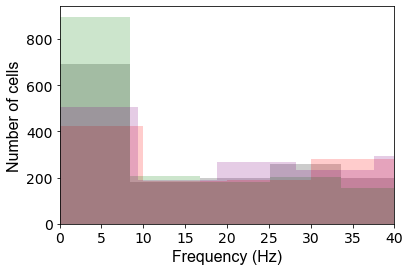

In [9]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

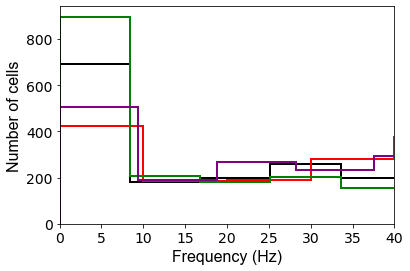

In [10]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

In [11]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [10,60]})

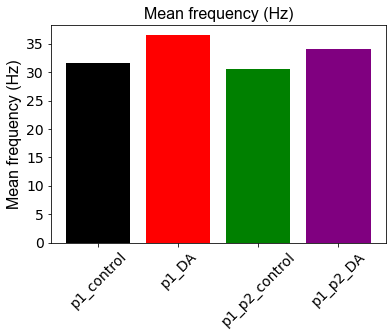

In [12]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [13]:
parameters = dict(pairs=list())

for d in ["control","DA"]:
    parameters["pairs"].append([f"p1_{d}", f"p1_p2_{d}", f"{d}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)
parameters

{'pairs': [['p1_control', 'p1_p2_control', 'control'],
  ['p1_DA', 'p1_p2_DA', 'DA']]}

In [14]:
colors = {"control": "black",
          "DA":"red"}

In [15]:
customize={plt.ylim:(-10,0)}

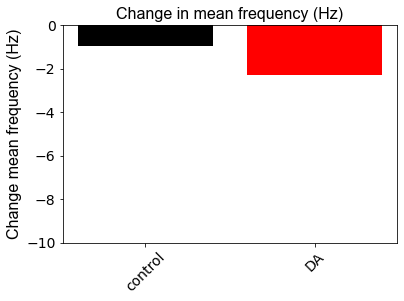

In [16]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["control", "DA"], save=True,customize=customize)

In [17]:
parameters = {"start": 1, "end": 1.5}

In [18]:
csfont = {"fontname": "Arial", 'fontsize': 22}

In [19]:
import pandas as pd
import seaborn as sns
d = {"distance": list(), "response": list()}
tmps = dict()
for distance in ["control","DA"]:
    print(distance)
    tmps.update({distance: list()})
    for ids in frequency_analysis_dict[f"p1_{distance}"]:
        d["distance"].append(distance)
        diff = frequency_analysis_dict[f"p1_p2_{distance}"][ids] - frequency_analysis_dict[f"p1_{distance}"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
        if diff > 10 and diff<20:
            print(ids)
df = pd.DataFrame(data=d)

control
1466
1468
1566
2659
3607
5893
7120
7460
8252
8272
9982
11266
11349
11561
12035
12178
12251
14455
14911
14938
15489
15495
15651
17555
17619
17848
18590
18768
18892
19216
19217
19285
19354
21389
24293
24890
25622
25629
25671
28417
28976
29166
29174
29594
30583
30860
32131
32132
33709
34134
35575
DA
1566
3214
3350
3611
4330
5548
6224
6794
7744
7817
8252
8470
10357
10474
11138
11369
12035
12093
12178
12251
12685
12882
13164
13613
13619
14058
15495
15864
15983
17399
17848
18590
18604
18647
18768
19152
19354
20121
21107
21389
21936
23836
24852
25525
25527
25541
27168
28352
28426
28483
28484
28547
29452
29459
29469
30555
31751
31786
31870
32131
33901
33947
34024
34183
35287
35428
35575


(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

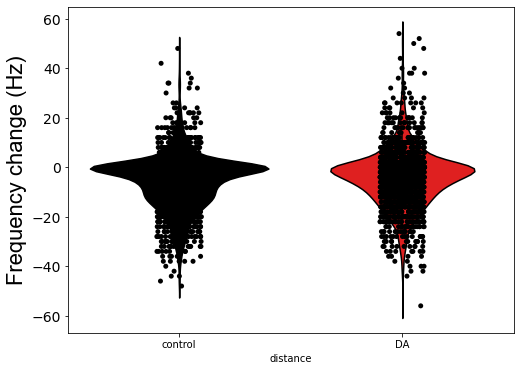

In [20]:
colors = {"control": "black",
          "DA":"red"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="distance", y="response", data=df,palette=colors)
sns.stripplot(x="distance", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.yticks(fontsize=14)

In [21]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 16.3 s, sys: 1.49 s, total: 17.8 s
Wall time: 4min 28s


In [22]:
colors = {"p1_control": "black",
         "p1_p2_control": "green",
          "p1_DA": "red",
         "p1_p2_DA": "purple"}
bins=10

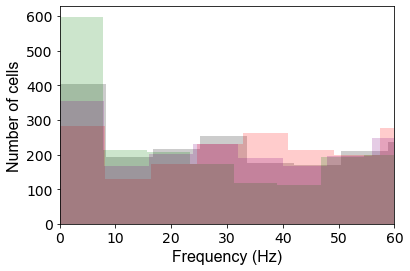

In [23]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,60)},
                         folder=folder, save=True)

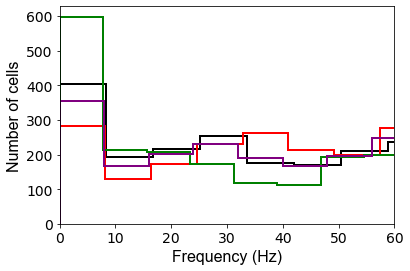

In [24]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,60)},
                         folder=folder, save=True)

In [25]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [10,60]})

In [26]:
colors = {"p1_control": "black",
         "p1_p2_control": "green",
          "p1_DA": "red",
         "p1_p2_DA": "purple"}
bins=10

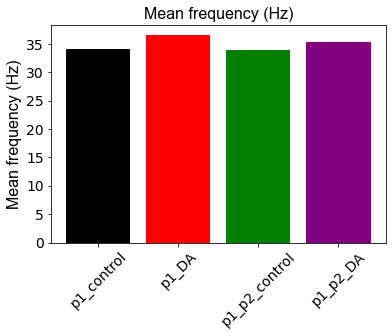

In [27]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [28]:
parameters = dict(pairs=list())

for d in ["control","DA"]:
    parameters["pairs"].append([f"p1_{d}", f"p1_p2_{d}", f"{d}"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)
parameters

{'pairs': [['p1_control', 'p1_p2_control', 'control'],
  ['p1_DA', 'p1_p2_DA', 'DA']]}

In [29]:
colors = {"control": "black",
          "DA":"red"}

In [30]:
customize={plt.ylim:(-2,0)}

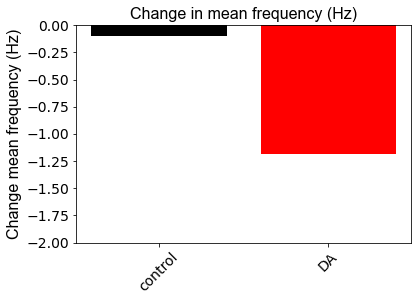

In [31]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["control", "DA"], save=True,customize=customize)

In [32]:
parameters = {"start": 1, "end": 1.5}

In [33]:
import pandas as pd
import seaborn as sns
d = {"distance": list(), "response": list()}
tmps = dict()
for distance in ["control","DA"]:
    tmps.update({distance: list()})
    for ids in frequency_analysis_dict[f"p1_{distance}"]:
        d["distance"].append(distance)
        diff = frequency_analysis_dict[f"p1_p2_{distance}"][ids] - frequency_analysis_dict[f"p1_{distance}"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

(array([-60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

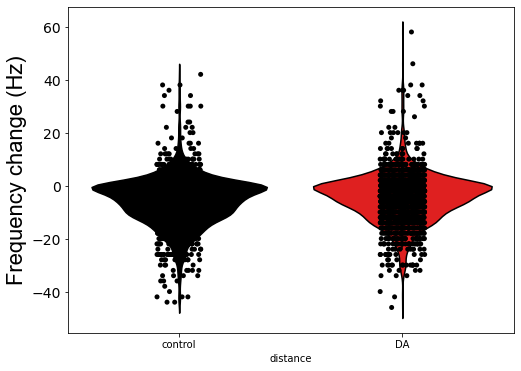

In [34]:
colors = {"control": "black",
          "DA":"red"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="distance", y="response", data=df,palette=colors)
sns.stripplot(x="distance", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.yticks(fontsize=14)